In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#desc = pd.read_csv('data_description.txt',sep ='\t',error_bad_lines=False)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Remove Id
df.drop(['Id'],axis = 1, inplace = True)
df_test.drop(['Id'],axis = 1, inplace = True)

Check the correlation betwenn numerical columns. And see which are the ones highly related to SaleProce our output column

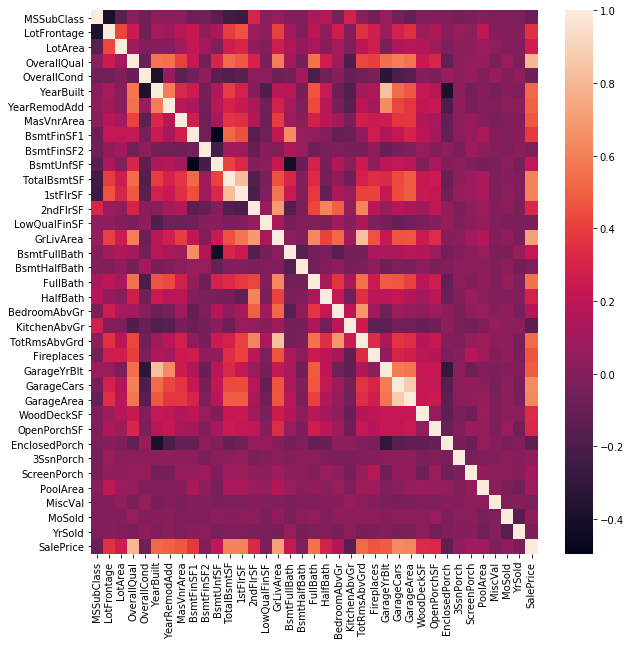

In [5]:
df_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
#Here we can see that garagecars and garage area are highly correlated. we can loose one column. Same with TotalNsmtSF and 1flrSF

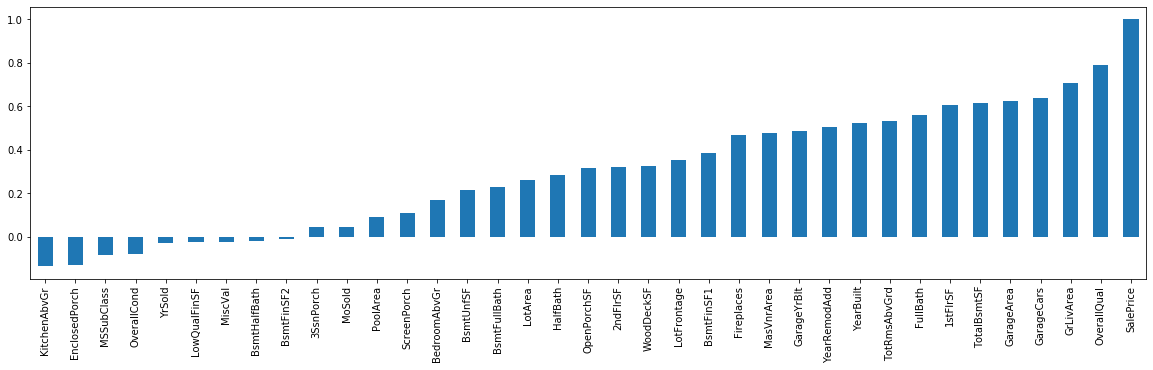

In [6]:
plt.figure(figsize=(20,5))
df.corr()['SalePrice'].sort_values().plot(kind='bar')

This shows the columns sale proce is highly correlated to. Meaning they have more impact on the output of the salePrice

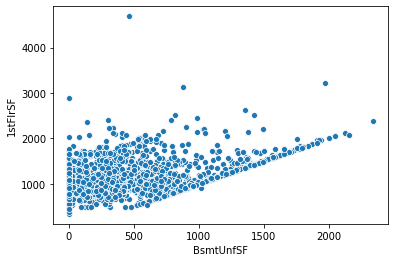

In [7]:
sns.scatterplot(x='BsmtUnfSF', y = '1stFlrSF',data = df)
#just to see there correlation. its quite linear

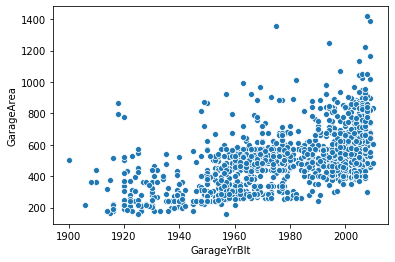

In [14]:
sns.scatterplot(x='GarageYrBlt', y = 'GarageArea',data = df)
#Not so linear

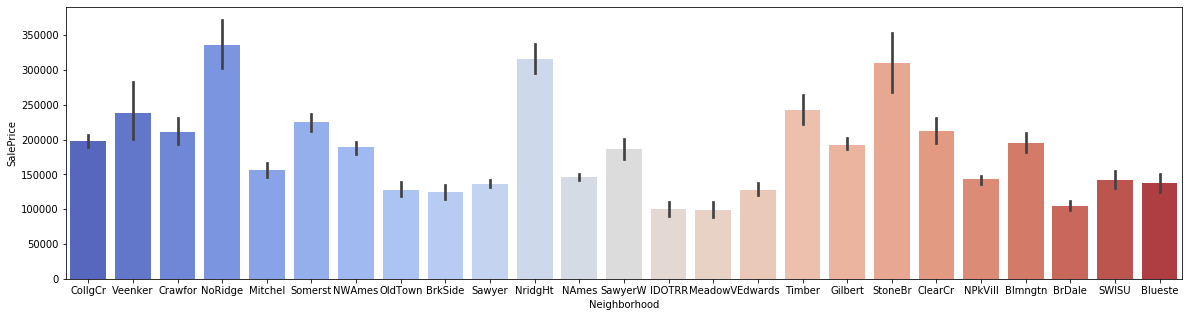

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x='Neighborhood', y = 'SalePrice',data = df,palette= 'coolwarm')
#Sales prices are higher in 3 neighborhoods

In [8]:
#Check for null values throughout dataset
df_null_cols = df.isnull().sum().sort_values(ascending = False)
df_null_cols = df_null_cols[df_null_cols > 0]
df_null_cols
df_test.isnull().sum().sort_values(ascending = False)

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
               ... 
1stFlrSF          0
Electrical        0
CentralAir        0
Heating           0
MSSubClass        0
Length: 79, dtype: int64

This is going to be long. We will have to anlayse all missing value columns and see if we can populate them or we need to remove them .When the number is high as pOOLQC that adds less value then we can maybe remove. When there are few values missing like in Electrical then maybe we can just drop that row. All needs to be chacked on evealutaion

In [9]:
#POOLQC
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

So this shows 1453 roperties doesnot have pool hence the difference. So we fill the POOLQC column with 0 for no pool

In [31]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

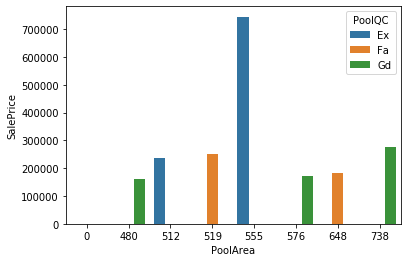

In [34]:
#Check how huch a pool affectsthe sale price
sns.barplot(x='PoolArea',y='SalePrice',data = df,hue='PoolQC')

No here the Pool area or quality are not so strong factors . lets also check the test set to see. Maybe we can reduce both to a one column binary attribute

In [37]:
#POOLQC
df_test['PoolArea'].unique()
df_test.groupby('PoolArea').count()['PoolQC']
#Very similar. Lets remove these columns from both test and training set

PoolArea
0      0
144    1
228    1
368    0
444    0
561    0
800    1
Name: PoolQC, dtype: int64

In [4]:
df['HasPool'] = df['PoolArea'] > 0
df_test['HasPool'] = df_test['PoolArea'] > 0

In [5]:
#Now drop the columns
df.drop(['PoolArea'],axis = 1, inplace = True)
df_test.drop(['PoolArea'],axis = 1, inplace = True)
df.drop(['PoolQC'],axis = 1, inplace = True)
df_test.drop(['PoolQC'],axis = 1, inplace = True)

In [6]:
df['MiscFeature'].unique()
df_test['MiscFeature'].unique()
#Too less values to infer any reasonable output out of it
df.drop(['MiscFeature'],axis = 1, inplace = True)
df_test.drop(['MiscFeature'],axis = 1, inplace = True)

In [48]:
#Alley
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

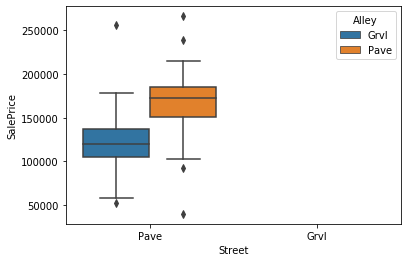

In [50]:
sns.boxplot(x='Street',y ='SalePrice',data = df,hue='Alley')

In [51]:
#Street Grvl No value??
df.groupby('Street').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
Street,,,,,,,,,,,,,,,,,,,,,
Grvl,6,6,5,6,0,6,6,6,6,6,...,6,6,0,6,6,6,6,6,6,6
Pave,1454,1454,1196,1454,91,1454,1454,1454,1454,1454,...,1454,1454,281,1454,1454,1454,1454,1454,1454,1454


In [52]:
df_test.groupby('Street').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
Street,,,,,,,,,,,,,,,,,,,,,
Grvl,6,5,5,6,0,6,6,5,6,6,...,6,6,6,1,6,6,6,6,6,6
Pave,1453,1450,1227,1453,107,1453,1453,1452,1453,1453,...,1453,1453,1453,289,1453,1453,1453,1452,1453,1453


Ok. Se we can remove the street column. Not colclusive as 90% common data. For Alley we can repleace with 'No' as it no Alley . Seems like Paved Alleys have better sale

In [7]:
df.drop(['Street'],axis = 1,inplace = True)
df_test.drop(['Street'],axis = 1,inplace = True)
df['Alley'] = df['Alley'].fillna('No')
df_test['Alley'] = df_test['Alley'].fillna('No')

In [58]:
df['Fence'].unique()
df.groupby('Fence').count()
df_test.groupby('Fence').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
Fence,,,,,,,,,,,,,,,,,,,,,
GdPrv,59,59,46,59,3,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
GdWo,58,58,49,58,2,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
MnPrv,172,172,147,172,12,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
MnWw,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


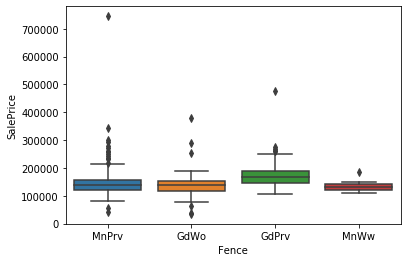

In [56]:
sns.boxplot(x='Fence',y ='SalePrice',data = df)
#Seems like GdPrv has highest Sales Proce. We can set rest to NA as No Fence

In [8]:
df['Fence'] = df['Fence'].fillna('NA')
df_test['Fence'] = df_test['Fence'].fillna('NA')

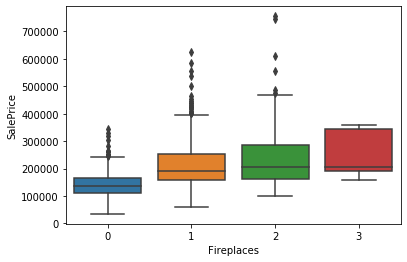

In [63]:
sns.boxplot(x='Fireplaces',y='SalePrice',data= df,hue='FireplaceQu')

It apperas that SalePrices depend on Fireplace quality and Firplaces quite a lot. They are all directly propertional. seems like when quality is null for those that have no firplaces

In [68]:
df.groupby('Fireplaces').sum()
df[df['FireplaceQu'].isnull()]['Fireplaces'].unique()

array([0], dtype=int64)

In [9]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NA')

In [79]:
#LotFrontage
df[['LotFrontage','LotArea']].corr()
df_LotFrontage = df.groupby('LotFrontage').describe()['LotArea']
df_LotFrontage[df_LotFrontage['count'] > 1]['mean'].sort_values()
#df_Lot_area_front = df[df.LotFrontage.isnull()]['LotArea'].sort_values()
#df_corr['LotFrontage']


LotFrontage
21.0      1726.608696
24.0      2285.842105
34.0      4278.800000
30.0      4553.833333
35.0      4778.000000
             ...     
115.0    19095.500000
174.0    20278.500000
130.0    20383.666667
118.0    24732.000000
313.0    45768.500000
Name: mean, Length: 90, dtype: float64

In [73]:
df.groupby('LotFrontage').describe()['SalePrice']

,count,mean,std,min,25%,50%,75%,max
LotFrontage,,,,,,,,
21.0,23.0,94278.260870,13823.035995,75000.0,84950.0,91000.0,103000.00,119500.0
24.0,19.0,145226.315789,19221.511159,106000.0,130000.0,147400.0,155000.00,179400.0
30.0,6.0,160480.833333,63670.035635,73000.0,145864.0,151000.0,168049.75,270000.0
32.0,5.0,186700.000000,77932.342452,130000.0,153500.0,162000.0,164000.00,324000.0
33.0,1.0,113000.000000,NaN,113000.0,113000.0,113000.0,113000.00,113000.0
...,...,...,...,...,...,...,...,...
160.0,1.0,745000.000000,NaN,745000.0,745000.0,745000.0,745000.00,745000.0
168.0,1.0,274725.000000,NaN,274725.0,274725.0,274725.0,274725.00,274725.0
174.0,2.0,319000.000000,118793.939239,235000.0,277000.0,319000.0,361000.00,403000.0


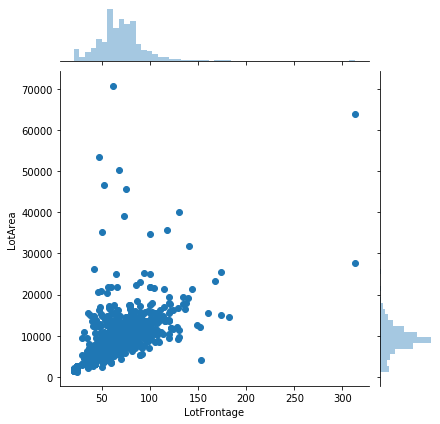

In [75]:
sns.jointplot(x='LotFrontage',y='LotArea',data = df[df['LotArea'] < 100000])

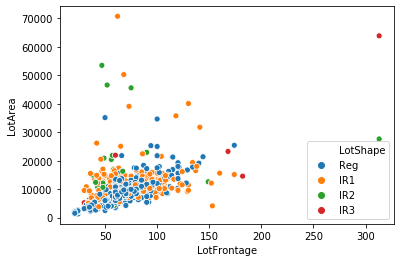

In [76]:
sns.scatterplot(x='LotFrontage',y='LotArea',data = df[df['LotArea'] < 100000], hue = 'LotShape')

As Lot Frontage was highly related to LotArea..Checked if there was a way to populate it with that but seems unlikey. But it is highly related to few other fators too. maybe we can user all them to get values for LotFronatage .Model to get values for Lotfrontage

In [81]:
df.corr()['LotFrontage']>0.35 

MSSubClass       False
LotFrontage       True
LotArea           True
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF       True
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
MiscVal          False
MoSold           False
YrSold           False
SalePrice         True
HasPool          False
Name: LotFrontage, dtype: bool

LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,SalePrice are the columns highly related to LotFrontage. Hence, we buiuld a linear model on them to predict the LotFrontage . We will not use SalePrice as that will lead to overfitting and also test set doenot have that

In [10]:
x_cal_LF = df[df['LotFrontage'].notna()][['LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd']]
x_fin_LF = df[df['LotFrontage'].isna()][['LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd']]
y_cal_LF = df[df['LotFrontage'].notna()]['LotFrontage']

#Do a split of training and test data to check goodness of fit later
from sklearn.model_selection import train_test_split
x_train_LF,x_test_LF,y_train_LF,y_test_LF = train_test_split(x_cal_LF, y_cal_LF, test_size= 0.2,random_state = 0)
y_train_LF = np.array(y_train_LF).reshape(-1,1)

In [11]:
x_train_LF.count()

LotArea         960
TotalBsmtSF     960
1stFlrSF        960
GrLivArea       960
TotRmsAbvGrd    960
dtype: int64

In [93]:
x_test_LF.count()

LotArea         259
TotalBsmtSF     259
1stFlrSF        259
GrLivArea       259
TotRmsAbvGrd    259
dtype: int64

In [107]:
y_cal_LF.count()
y_cal_LF

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1201, dtype: float64

In [96]:
x_cal_LF

,LotArea,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd
0,8450,856,856,1710,8
1,9600,1262,1262,1262,6
2,11250,920,920,1786,6
3,9550,756,961,1717,7
4,14260,1145,1145,2198,9
...,...,...,...,...,...
1455,7917,953,953,1647,7
1456,13175,1542,2073,2073,7
1457,9042,1152,1188,2340,9
1458,9717,1078,1078,1078,5


In [12]:
#Featurescale both x and y before appplying any model
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()
x_train_LF = x_scaler.fit_transform(x_train_LF)
x_test_LF = x_scaler.fit_transform(x_test_LF)
y_train_LF = y_scaler.fit_transform(y_train_LF)

In [13]:
#Test on multilinear model
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(x_train_LF,y_train_LF)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred_LF = Regressor.predict(x_test_LF)
y_pred_LF

array([[-0.55304663],
       [ 0.18366443],
       [-0.06372746],
       [ 0.57255478],
       [ 0.61015205],
       [ 0.35228817],
       [-0.43469821],
       [-0.26485005],
       [ 0.15399931],
       [ 0.05664195],
       [-0.4047495 ],
       [-0.82411329],
       [ 0.41331576],
       [-0.20697535],
       [-0.19913196],
       [-1.4685009 ],
       [-0.92351156],
       [-0.19596001],
       [-0.68998854],
       [ 0.27674905],
       [ 0.02707608],
       [-0.24786121],
       [ 0.48477572],
       [-0.95654845],
       [-0.15736943],
       [ 0.5814043 ],
       [-0.28923992],
       [ 0.14690065],
       [-0.2602457 ],
       [-0.51270613],
       [-0.1840502 ],
       [ 0.62769286],
       [-0.11921708],
       [ 0.06919741],
       [-0.45514709],
       [ 0.15513799],
       [ 1.75490538],
       [-0.18799327],
       [-0.22806918],
       [-0.29155554],
       [ 0.21821683],
       [ 0.37516946],
       [-0.16583298],
       [-0.27624768],
       [-0.05959282],
       [-0

In [20]:
y_test_LF =  y_scaler.fit_transform(y_test_LF)
y_test_LF = np.array(y_test_LF).reshape(-1,1)
y_test_LF

array([[-3.01127812e-01],
       [-1.54635435e+00],
       [-4.50554996e-01],
       [ 1.24295309e+00],
       [-5.00364057e-01],
       [ 5.45626234e-01],
       [ 4.75356188e-02],
       [-2.01509689e-01],
       [-5.99982180e-01],
       [ 2.96580926e-01],
       [-9.48645611e-01],
       [-1.44673623e+00],
       [ 5.45626234e-01],
       [-9.48645611e-01],
       [-1.01891566e-01],
       [-9.48645611e-01],
       [-1.69578153e+00],
       [-6.99600303e-01],
       [-4.50554996e-01],
       [ 1.29276216e+00],
       [ 7.94671541e-01],
       [-5.20825041e-02],
       [-4.50554996e-01],
       [-2.39310839e+00],
       [-4.50554996e-01],
       [ 7.44862480e-01],
       [-9.48645611e-01],
       [ 2.96580926e-01],
       [-1.74559059e+00],
       [-4.50554996e-01],
       [ 7.94671541e-01],
       [ 2.96580926e-01],
       [-4.50554996e-01],
       [-9.48645611e-01],
       [-2.01509689e-01],
       [ 2.96580926e-01],
       [ 1.96962803e-01],
       [-5.99982180e-01],
       [ 5.4

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test_LF, y_pred_LF))


0.8492241331603523

In [125]:
y_test_LF


242      63.0
400      38.0
54       60.0
316      94.0
748      59.0
        ...  
65       76.0
601      50.0
826      50.0
1099     82.0
1052    100.0
Name: LotFrontage, Length: 241, dtype: float64

Not  a good Model .. We will try few other regression modelels like SVR , Random Forest

In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor_2 = DecisionTreeRegressor()
regressor_2.fit(x_train_LF,y_train_LF)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [131]:
y_pred_LF2 = Regressor.predict(x_test_LF)
y_pred_LF2

array([[-0.55304663],
       [ 0.18366443],
       [-0.06372746],
       [ 0.57255478],
       [ 0.61015205],
       [ 0.35228817],
       [-0.43469821],
       [-0.26485005],
       [ 0.15399931],
       [ 0.05664195],
       [-0.4047495 ],
       [-0.82411329],
       [ 0.41331576],
       [-0.20697535],
       [-0.19913196],
       [-1.4685009 ],
       [-0.92351156],
       [-0.19596001],
       [-0.68998854],
       [ 0.27674905],
       [ 0.02707608],
       [-0.24786121],
       [ 0.48477572],
       [-0.95654845],
       [-0.15736943],
       [ 0.5814043 ],
       [-0.28923992],
       [ 0.14690065],
       [-0.2602457 ],
       [-0.51270613],
       [-0.1840502 ],
       [ 0.62769286],
       [-0.11921708],
       [ 0.06919741],
       [-0.45514709],
       [ 0.15513799],
       [ 1.75490538],
       [-0.18799327],
       [-0.22806918],
       [-0.29155554],
       [ 0.21821683],
       [ 0.37516946],
       [-0.16583298],
       [-0.27624768],
       [-0.05959282],
       [-0

In [132]:
mean_squared_error(y_test_LF, y_pred_LF2)

0.7211816283419517

Still The same.. This doesnot seem like a good idea. Maybe we needed more columns. For now we can fill the values with the median. That is the best case for us after this attempt

In [25]:
df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [17]:
#Garage columns. We compare if in all cases the same columns have the data missing or not
#Gararge type there are 81 values each. Check if all are same data
df[df['GarageType'].isnull()]['GarageYrBlt'].sum() #same zeroes
df[df['GarageType'].isnull()]['GarageCond'].sum() #same zeroes
df[df['GarageType'].isnull()]['GarageQual'].sum()
df[df['GarageType'].isnull()]['GarageFinish'].sum()
#This means that the ones with null have no garages

0

In [26]:
df['GarageType'].unique()
#Fill nan of garagetype as no.We will consider that these gouses have no garage
df['GarageType'] = df['GarageType'].fillna('No')
df_test['GarageType'] = df_test['GarageType'].fillna('No')

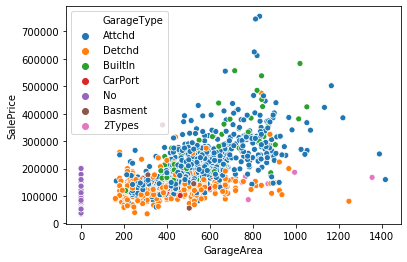

In [136]:
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageType',data= df) 
#Good factor. The builtin garages have higher sale price

In [19]:
sorted(df['GarageYrBlt'].unique())

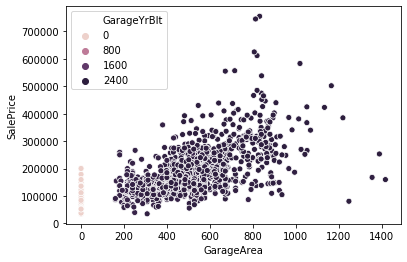

In [138]:
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageYrBlt',data= df) #Good factor. Recent years seem to have higher prices


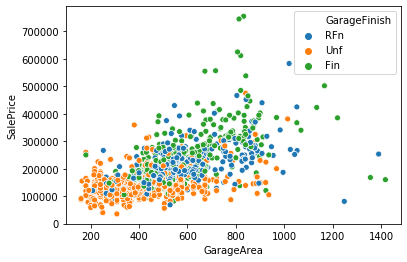

In [20]:
df['GarageFinish'].unique()
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageFinish',data= df) #Good factor. The finished garages have higher sale price as expected

In [28]:
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageCond'].unique()
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('NA')
df_test['GarageCond'] = df_test['GarageCond'].fillna('NA')
df_test['GarageQual'] = df_test['GarageQual'].fillna('NA')

In [20]:
df[df['GarageQual'] != df['GarageCond']].count() #59 rows where they donot match
df.groupby('GarageQual').count()['GarageCond']
df.groupby('GarageCond').count()['GarageQual']

GarageCond
Ex       2
Fa      35
Gd       9
NA      81
Po       7
TA    1326
Name: GarageQual, dtype: int64

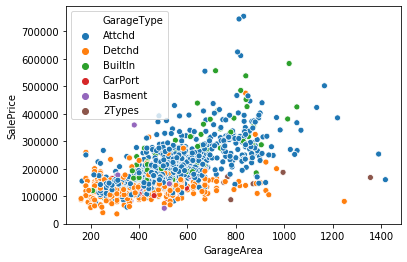

In [15]:
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageType',data= df) 
#Good factor. The builtin garages have higher sale price


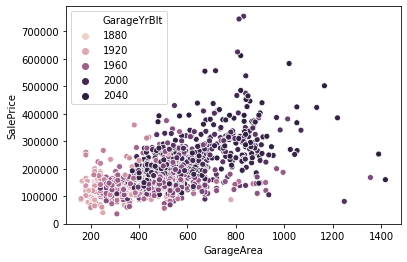

In [16]:
sorted(df['GarageYrBlt'].unique())
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageYrBlt',data= df) #Good factor. Recent years seem to have higher prices

In [27]:
df['GarageType'] = df['GarageType'].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df_test['GarageType'] = df_test['GarageType'].fillna('NA')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(0)

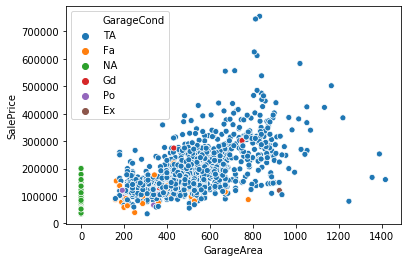

In [142]:
#We cannot have both columns so decide to drop one. We choosethe one with a little more diversity GarageCond
sns.scatterplot(x='GarageArea',y='SalePrice',hue='GarageCond',data= df) #Not much impact ans eems mostly al are TA. Closer look required

In [143]:
df.groupby('GarageQual').count()['GarageCond']

GarageQual
Ex       3
Fa      48
Gd      14
NA      81
Po       3
TA    1311
Name: GarageCond, dtype: int64

In [23]:
#All The basement columns
df[df['BsmtFinType2'].isnull()].groupby('BsmtExposure').count() #same zeroes or a No
df[df['BsmtFinType2'].isnull()].groupby('BsmtQual').count() #same zeroes
df[df['BsmtFinType2'].isnull()].groupby('BsmtFinType1').count()
df[df['BsmtFinType2'].isnull()].groupby('BsmtCond').count()
#Except the one record all are null so we can consider no basement. Below we check if thr 1 row returned above idicates the same row in every case

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
BsmtCond,,,,,,,,,,,,,,,,,,,,,
TA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


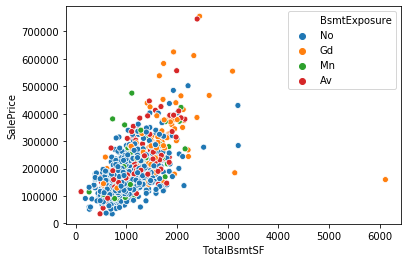

In [26]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',hue='BsmtExposure',data= df) 

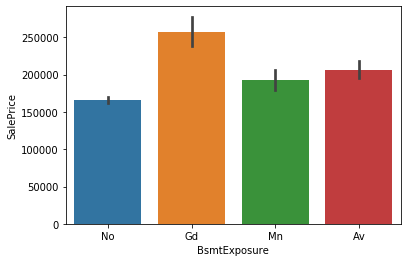

In [27]:
sns.barplot(x='BsmtExposure',y='SalePrice',data= df)
#When basement is good .. proces are high. thpugh majority have no basement

In [29]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
df['BsmtQual'] = df['BsmtQual'].fillna('No')
df['BsmtCond'] = df['BsmtCond'].fillna('No')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('No')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('No')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('No')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('No')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('No')

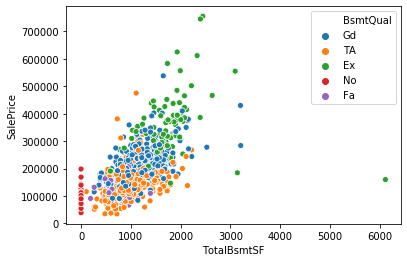

In [29]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',hue='BsmtQual',data= df)
#Price is higher when basement quality is excellent

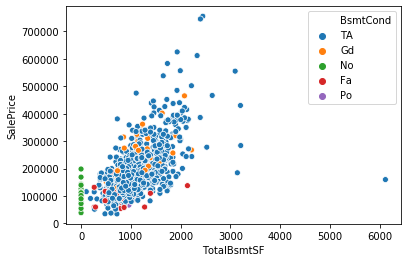

In [30]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',hue='BsmtCond',data= df)
#Not much impact ans eems mostly al are TA.But fair and poor are low priced and good ones do better


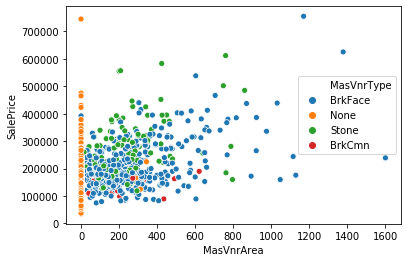

In [30]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrType'].unique()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test['MasVnrType'].unique()
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
sns.scatterplot(x='MasVnrArea',y='SalePrice',hue='MasVnrType',data= df)
#Price increases with area but correlation is low. but stone houses are much more preffered


In [33]:
df.isnull().sum().sort_values(ascending = False)


Electrical      1
HasPool         0
BsmtQual        0
Exterior1st     0
Exterior2nd     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
MSSubClass      0
Length: 77, dtype: int64

Electrical has just 1 row missing. we can just skip that by deleteing the row

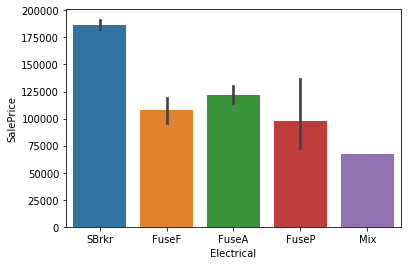

In [34]:
df = df[df['Electrical'].notnull()]
df['Electrical'].unique()
df.groupby('Electrical').count()
sns.barplot(x='Electrical',y='SalePrice',data= df)
#SBrkr is most high proces and that is the general option ususally too

In [35]:
#Same for test set
df_test.isnull().sum().sort_values(ascending = False)

MSZoning        4
Functional      2
Utilities       2
BsmtHalfBath    2
BsmtFullBath    2
               ..
1stFlrSF        0
Electrical      0
CentralAir      0
HeatingQC       0
MSSubClass      0
Length: 76, dtype: int64

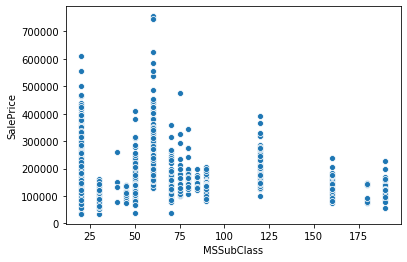

In [36]:
#MSSubclass
df['MSSubClass'].unique()
df['MSZoning'].unique()
df.groupby('MSSubClass').count()
sns.scatterplot(x='MSSubClass',y='SalePrice',data= df)
#For classes below 75 the the sale price is high. It has -ve correlation to Price

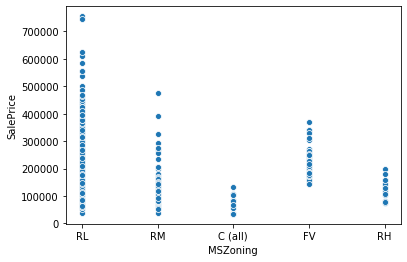

In [37]:
df.groupby('MSZoning').count()#almost 70% in one sector. Check its contribution to Sale Price
sns.scatterplot(x='MSZoning',y='SalePrice',data= df) 
#Can we get rid of this??? RL is the best factor

In [39]:
#Test bacth missing MSZoing
df_test[df_test['MSZoning'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
455,30,NaN,109.000000,21780,No,Reg,Lvl,NaN,Inside,Gtl,...,0,0,0,NA,0,3,2009,ConLD,Normal,False
756,20,NaN,80.000000,14584,No,Reg,Low,AllPub,Inside,Mod,...,0,0,0,NA,0,2,2008,WD,Abnorml,False
790,70,NaN,68.580357,56600,No,IR1,Low,AllPub,Inside,Gtl,...,0,0,0,NA,0,1,2008,WD,Normal,False
1444,20,NaN,125.000000,31250,No,Reg,Lvl,AllPub,Inside,Gtl,...,135,0,0,NA,0,5,2006,WD,Normal,False


In [40]:
df_test[df_test['MSZoning'].notnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
0,20,RH,80.0,11622,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,MnPrv,0,6,2010,WD,Normal,False
1,20,RL,81.0,14267,No,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NA,12500,6,2010,WD,Normal,False
2,60,RL,74.0,13830,No,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,3,2010,WD,Normal,False
3,60,RL,78.0,9978,No,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,6,2010,WD,Normal,False
4,120,RL,43.0,5005,No,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,NA,0,1,2010,WD,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,6,2006,WD,Normal,False
1455,160,RM,21.0,1894,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,4,2006,WD,Abnorml,False
1456,20,RL,160.0,20000,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NA,0,9,2006,WD,Abnorml,False
1457,85,RL,62.0,10441,No,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,700,7,2006,WD,Normal,False


In [42]:
df_test.groupby('MSZoning')['MSSubClass'].mean()

MSZoning
C (all)     62.666667
FV          88.378378
RH         105.000000
RL          49.389587
RM          82.747934
Name: MSSubClass, dtype: float64

The above groupby just tells us the nearest MSZone for each possible Subclass.Here we see that RL is the one closest to the 20 and maybe C'all'  for the one at 70

In [52]:
df_test[df_test['MSZoning'].isnull()].index

Int64Index([455, 756, 790, 1444], dtype='int64')

In [57]:
df_test.iloc[790] #790 should have C (all)

MSSubClass            70
MSZoning             NaN
LotFrontage      68.5804
LotArea            56600
Alley                 No
                  ...   
MoSold                 1
YrSold              2008
SaleType              WD
SaleCondition     Normal
HasPool            False
Name: 790, Length: 76, dtype: object

In [62]:
df_test.iloc[790]['MSZoning'] = 'C (all)' 

C:\Users\siddhartha_bhadra\Documents\ananya\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL') #For the rest

In [73]:
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0) 
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0) 

In [65]:
df_test['Functional'].unique()

array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Sev', 'Maj2', nan],
      dtype=object)

In [66]:
df_test.groupby('Functional').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
Functional,,,,,,,,,,,,,,,,,,,,,
Maj1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Maj2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Min1,34,34,34,34,34,34,34,33,34,34,...,34,34,34,34,34,34,34,34,34,34
Min2,36,36,36,36,36,36,36,35,36,36,...,36,36,36,36,36,36,36,36,36,36
Mod,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Sev,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Typ,1357,1357,1357,1357,1357,1357,1357,1357,1357,1357,...,1357,1357,1357,1357,1357,1357,1357,1356,1357,1357


In [67]:
#Typ is most common and we hence set the missing to the same typ
df_test['Functional'] = df_test['Functional'].fillna('Typ') 

In [68]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [69]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [70]:
df.groupby('Utilities').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
Utilities,,,,,,,,,,,,,,,,,,,,,
AllPub,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,...,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
NoSeWa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


This column has no meaning. There is only one NoSewa value. That too test set doesnot even have it. We remove the column

In [71]:
df.drop(['Utilities'],axis = 1,inplace = True)
df_test.drop(['Utilities'],axis = 1,inplace = True)

In [87]:
#The remaining
df_test.isnull().sum().sort_values(ascending = False) 

SaleType        1
Exterior1st     1
Exterior2nd     1
KitchenQual     1
HasPool         0
               ..
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

In [83]:
df_test[df_test['TotalBsmtSF'].isnull()]['BsmtFinType1'] 

660    No
Name: BsmtFinType1, dtype: object

Bsmt all the same column have null and there type is also No. So we can set them to 0

In [84]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0) 
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0) 
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0) 
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0) 

In [86]:
#Same for garage 
df_test['GarageCars'] = df_test['GarageCars'].fillna(0) 
df_test['GarageArea'] = df_test['GarageArea'].fillna(0) 

In [90]:
#sale Type
df['SaleType'].unique()
df.groupby('SaleType').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,HasPool
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
CWD,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Con,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
ConLD,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
ConLI,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
ConLw,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
New,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
Oth,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
WD,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266,...,1266,1266,1266,1266,1266,1266,1266,1266,1266,1266


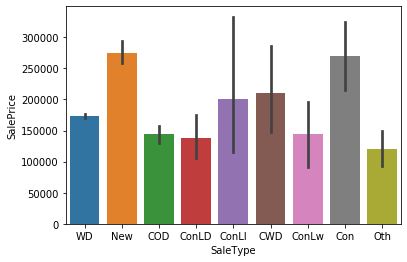

In [89]:
sns.barplot(x='SaleType',y='SalePrice',data= df)

In [91]:
#Same for test
df_test.groupby('SaleType').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleCondition,HasPool
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
CWD,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Con,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
ConLD,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
ConLI,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
ConLw,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
New,117,117,117,117,117,117,117,117,117,117,...,117,117,117,117,117,117,117,117,117,117
Oth,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
WD,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258,...,1258,1258,1258,1258,1258,1258,1258,1258,1258,1258


In [92]:
#Fill the missing with max values
df_test['SaleType'] = df_test['SaleType'].fillna('WD') 

In [93]:
df_test['Exterior1st'].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       nan, 'CBlock'], dtype=object)

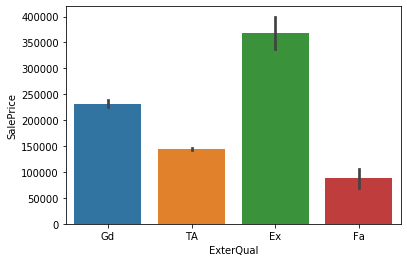

In [100]:
df['ExterQual'].unique()
df.groupby('ExterQual').count()
sns.barplot(x='ExterQual',y='SalePrice',data= df)



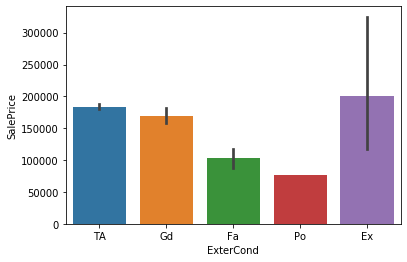

In [101]:
df['ExterCond'].unique()
df.groupby('ExterCond').count()
sns.barplot(x='ExterCond',y='SalePrice',data= df)

In [94]:
df['Exterior1st'].unique()
df.groupby('Exterior1st').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
AsphShn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BrkComm,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BrkFace,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
CBlock,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CemntBd,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
HdBoard,222,222,222,222,222,222,222,222,222,222,...,222,222,222,222,222,222,222,222,222,222
ImStucc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MetalSd,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220


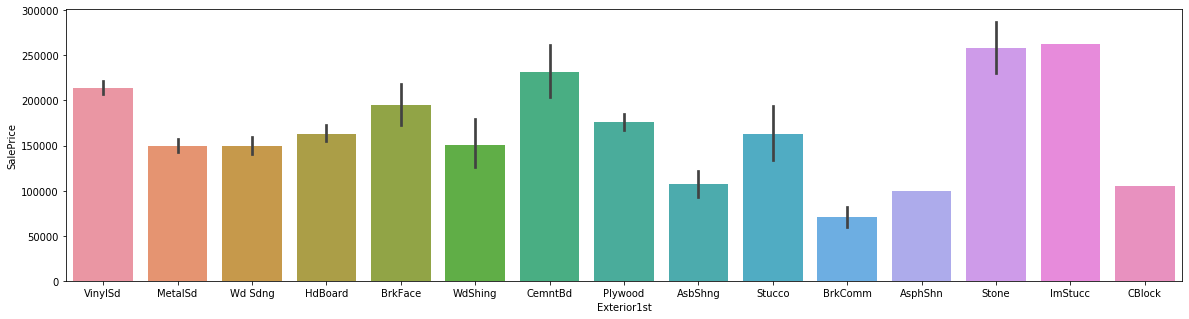

In [95]:
plt.figure(figsize=(20,5))
sns.barplot(x='Exterior1st',y='SalePrice',data= df)

In [96]:
df_test.groupby('Exterior1st').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
AsphShn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
BrkComm,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
BrkFace,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
CBlock,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
CemntBd,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
HdBoard,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220
MetalSd,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
Plywood,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113


In [97]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd') 

In [98]:
df_test.groupby('Exterior2nd').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
Exterior2nd,,,,,,,,,,,,,,,,,,,,,
AsbShng,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
AsphShn,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Brk Cmn,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
BrkFace,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
CBlock,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CmentBd,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
HdBoard,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
ImStucc,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
MetalSd,233,233,233,233,233,233,233,233,233,233,...,233,233,233,233,233,233,233,233,233,233


In [99]:
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('VinylSd') 

In [102]:
#KitchenQual
df_test.groupby('KitchenQual').count()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,105,105,105,105,105,105,105,105,105,105,...,105,105,105,105,105,105,105,105,105,105
Fa,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
Gd,565,565,565,565,565,565,565,565,565,565,...,565,565,565,565,565,565,565,565,565,565
TA,757,757,757,757,757,757,757,757,757,757,...,757,757,757,757,757,757,757,757,757,757


In [103]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA') 

In [104]:
#The remaining
df_test.isnull().sum().sort_values(ascending = False) 

HasPool         0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
               ..
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
MSSubClass      0
Length: 75, dtype: int64

Label encoding
Now, we have got rid of missing values throughout. Next we encode all the categry columns so we can see the relationship of each with Output


In [132]:
from sklearn.preprocessing import LabelEncoder
#le_x = LabelEncoder()
#le_x.fit_transform(df)
df = df.apply(LabelEncoder().fit_transform)
#Explained below

In [133]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
0,5,3,36,327,1,3,3,4,0,5,...,0,0,4,0,1,2,8,4,412,0
1,0,3,52,498,1,3,3,2,0,24,...,0,0,4,0,4,1,8,4,339,0
2,5,3,39,701,1,0,3,4,0,5,...,0,0,4,0,8,2,8,4,442,0
3,6,3,31,489,1,0,3,0,0,6,...,0,0,4,0,1,0,8,0,194,0
4,5,3,56,924,1,0,3,2,0,15,...,0,0,4,0,11,2,8,4,494,0


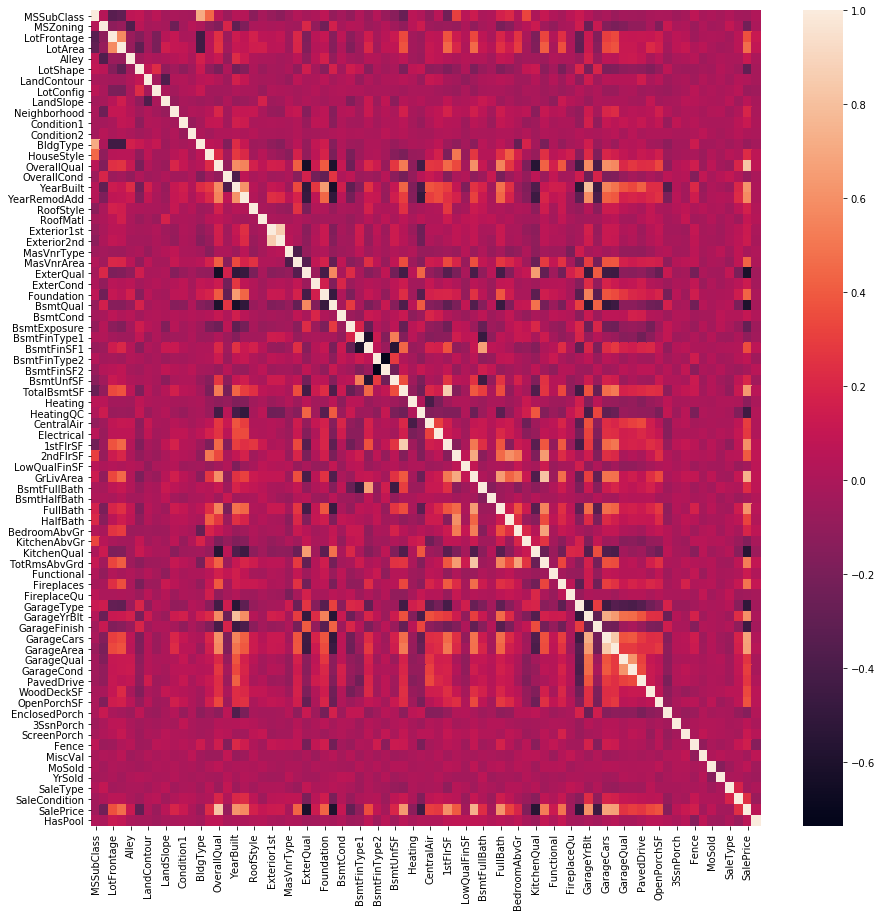

In [134]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [135]:
#Some column have high correlation to each other.. Keep one
#One among exterior1st and 2nd
#LotFrontage and Lot Area # call after checking below graph. We keep both
#Garage cars and garage area # Remove garagearea
#GarageQual and Garage cond #GarageQuality

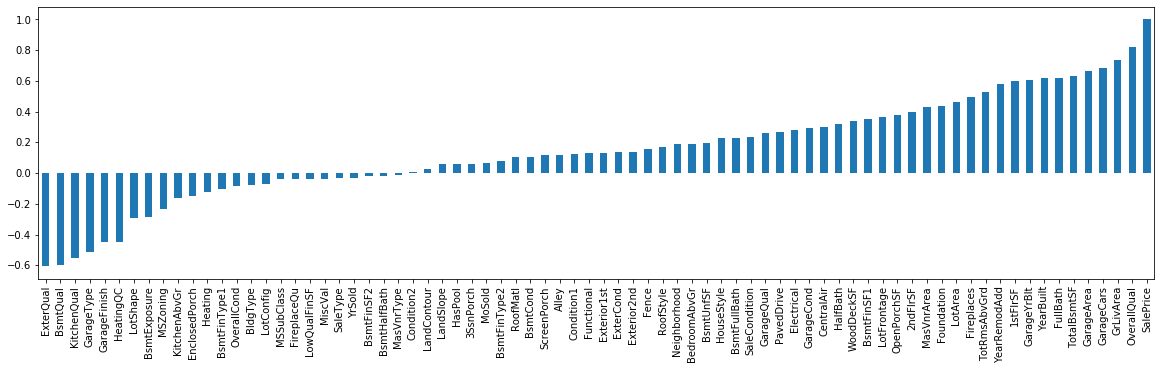

In [136]:
plt.figure(figsize=(20,5))
df.corr()['SalePrice'].sort_values().plot(kind='bar')

From above bar we see some columns have very low impact on sale price. We drop them specially if they are categorical and will add too many columns on one hotencoding

In [137]:
#Columns to go are LandContour,Condition2,MasVnrType,BsmtHalfBath,BsmtFinSF2,YrSold,SaleType,MiscVal,LowQualFinSfFireplaceQu,MSSubClass
df.drop(['LandContour','Condition2','MasVnrType','BsmtHalfBath','BsmtFinSF2','YrSold','SaleType','MiscVal','LowQualFinSF','FireplaceQu','MSSubClass','GarageArea','GarageCond'],axis = 1, inplace = True)

In [138]:
#Same with test
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.drop(['LandContour','Condition2','MasVnrType','BsmtHalfBath','BsmtFinSF2','YrSold','SaleType','MiscVal','LowQualFinSF','FireplaceQu','MSSubClass','GarageArea','GarageCond'],axis = 1, inplace = True)

In [139]:
df.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,SaleCondition,SalePrice,HasPool
0,3,36,327,1,3,4,0,5,2,0,...,0,49,0,0,0,4,1,4,412,0
1,3,52,498,1,3,2,0,24,1,0,...,187,0,0,0,0,4,4,4,339,0
2,3,39,701,1,0,4,0,5,2,0,...,0,30,0,0,0,4,8,4,442,0
3,3,31,489,1,0,0,0,6,2,0,...,0,24,108,0,0,4,1,0,194,0
4,3,56,924,1,0,2,0,15,2,0,...,118,70,0,0,0,4,11,4,494,0


In [142]:
df.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence',
       'MoSold', 'SaleCondition', 'SalePrice', 'HasPool'],
      dtype='object')

In [144]:
#Now one hot encoding
df = pd.get_dummies(df, columns = ['MSZoning', 'Alley', 'LotShape', 
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional',  'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',  
                                   'Fence','SaleCondition'], drop_first = True)

In [145]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'PavedDrive_2', 'Fence_1', 'Fence_2', 'Fence_3', 'Fence_4',
       'SaleCondition_1', 'SaleCondition_2', 'SaleCondition_3',
       'SaleCondition_4', 'SaleCondition_5'],
      dtype='object', length=210)

In [146]:
#Same for df_test
df_test = pd.get_dummies(df_test, columns = ['MSZoning', 'Alley', 'LotShape', 
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
       'Functional',  'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',  
                                   'Fence','SaleCondition'], drop_first = True)

In [148]:
#Split data into input output set
x = df.drop(['SalePrice'],axis = 1)
y = df['SalePrice']

In [149]:
# splitting test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 0)

In [151]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
s_scale = StandardScaler()
x_train = s_scale.fit_transform(x_train)
x_test = s_scale.fit_transform(x_test)
df_test = s_scale.fit_transform(df_test)

In [153]:
y_train = s_scale.fit_transform(np.array(y_train).reshape(-1,1))
y_test = s_scale.fit_transform(np.array(y_test).reshape(-1,1))

In [155]:
#Nowapplying XGboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(x_train,y_train)

[17:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [156]:
y_pred = xg_reg.predict(x_test)

In [161]:
mean_squared_error(y_test, y_pred)

0.3709415237738949

In [162]:
#This is not Bad. Apply this to test set